# Randomly distribute photons across FoV of 3 EPIC Detectors (PN, MOS-1, and MOS-2)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create Statistical Summary Table

In [18]:
# Create Summary Table
df = pd.DataFrame(list(), columns = ['Observation Date', 'Uranus Diameter', 
                                     'PN Width', 'PN Height', 'PN Boxes', 'PN FoV Counts', 
                                     'PN Uranus Counts', 'MOS-1 Width', 'MOS-1 Height',
                                     'MOS-1 Boxes', 'MOS-1 FoV Counts', 
                                     'MOS-1 Uranus Counts', 'MOS-2 Width', 'MOS-2 Height',
                                     'MOS-2 Boxes', 'MOS-2 FoV Counts',
                                     'MOS-2 Uranus Counts'])

data = pd.DataFrame([['August 2022', 3.63, 
                      38 * 3.63, 38 * 3.63, 1444, 24995, 20, 
                      12 * 3.63, 12 * 3.63, 144, 1406, 7, 
                      26 * 3.63, 26 * 3.63, 676, 4987, 7], 
                     ['January 2023', 3.64, 
                      38 * 3.64, 39 * 3.64, 1482, 33166, 41, 
                      12 * 3.64, 12 * 3.64, 144, 2082, 11, 
                      26 * 3.64, 27 * 3.64, 702, 6677, 10],
                     ['February 2023', 3.57, 
                      38 * 3.57, 39 * 3.57, 1482, 9931, 14, 
                      12 * 3.57, 12 * 3.57, 144, 503, 5, 
                      26 * 3.57, 26 * 3.57, 676, 2137, 2]], 
                     columns = ['Observation Date', 'Uranus Diameter', 
                                     'PN Width', 'PN Height', 'PN Boxes', 'PN FoV Counts', 
                                     'PN Uranus Counts', 'MOS-1 Width', 'MOS-1 Height',
                                     'MOS-1 Boxes', 'MOS-1 FoV Counts', 
                                     'MOS-1 Uranus Counts', 'MOS-2 Width', 'MOS-2 Height',
                                     'MOS-2 Boxes', 'MOS-2 FoV Counts',
                                     'MOS-2 Uranus Counts'])
df = df._append(data)
df


,Observation Date,Uranus Diameter,PN Width,PN Height,PN Boxes,PN FoV Counts,PN Uranus Counts,MOS-1 Width,MOS-1 Height,MOS-1 Boxes,MOS-1 FoV Counts,MOS-1 Uranus Counts,MOS-2 Width,MOS-2 Height,MOS-2 Boxes,MOS-2 FoV Counts,MOS-2 Uranus Counts
0,August 2022,3.63,137.94,137.94,1444,24995,20,43.56,43.56,144,1406,7,94.38,94.38,676,4987,7
1,January 2023,3.64,138.32,141.96,1482,33166,41,43.68,43.68,144,2082,11,94.64,98.28,702,6677,10
2,February 2023,3.57,135.66,139.23,1482,9931,14,42.84,42.84,144,503,5,92.82,92.82,676,2137,2


In [247]:
# Sample Plot - Aug 2022 

# Simulate
# 1) Initialize Variables - Inputs
n_simulations = int(100) 
n_uranus_pn = []
n_uranus_mos1 = []
n_uranus_mos2 = []

for _ in range(n_simulations):
    # New Plot for each simulation
    fig, ax = plt.subplots(1, 3, figsize = (20,10))

    # Plot 1 - PN Detector
    ind = 0
    ax[0].set_title("EPIC-pn Detector Random Distribution")
    ax[0].set_xlim(0, df['PN Width'].iloc[ind]) 
    ax[0].set_ylim(0, df['PN Height'].iloc[ind])
    ax[0].axhline(df['PN Height'].iloc[ind], linestyle = '--', color = 'red')
    ax[0].axvline(df['PN Width'].iloc[ind], linestyle = '--', color = 'red')

    # Synthetic Data - Random Points - Uniform Distribution
    l_xs = np.random.uniform(0, df['PN Width'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind]) # New data Uranus+FoV Size
    l_ys = np.random.uniform(0, df['PN Height'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])

    # Create a DataFrame that sorts x & y values into bins
    height_bins1 = np.linspace(0, df['PN Height'].iloc[ind],  int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
    width_bins1 = np.linspace(0, df['PN Width'].iloc[ind],  int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

    for i in range(len(height_bins1)):
        ax[0].axvline(height_bins1[i],linestyle = '--', color = 'red' )
        ax[0].axhline(height_bins1[i],linestyle = '--', color = 'red' )

    # Assign bin value
    x_sort = []
    y_sort = []
    for i in range(len(l_xs)):
        x = width_bins1[np.where(l_xs[i] - width_bins1 >= 0)[0][-1]]
        y = height_bins1[np.where(l_ys[i] - height_bins1 >= 0)[0][-1]]

        x_sort.append(x)
        y_sort.append(y)

    data = {'X vals': l_xs, 
            'Y vals': l_ys, 
            'X bin': x_sort,
            'Y bin': y_sort,
            'Sum Values': np.ones(len(l_xs))}

    df1 = pd.DataFrame(data)
    Z1 = pd.pivot_table(df1, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
    figure1 = ax[0].imshow(Z1[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
    cbar1 = fig.colorbar(figure1, ax = ax[0], shrink = 0.74)

    # Plot points
    #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

    # Find Uranus Counts
    # Height bin = Total Height Bins / 2
    # Width bin = (Total Width Bins / 2) + 1
    ur_height_bin1 = height_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
    ur_width_bin1 = width_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
    uranus_counts1 = Z1[::-1][ur_width_bin1][ur_height_bin1]
    n_uranus_pn.append(uranus_counts1)

    # Plot 2 - MOS-1 Detector
    ind = 0
    ax[1].set_title("EPIC MOS-1 Detector Random Distribution")
    ax[1].set_xlim(0, df['MOS-1 Width'].iloc[ind]) 
    ax[1].set_ylim(0, df['MOS-1 Height'].iloc[ind])
    ax[1].axhline(df['MOS-1 Height'].iloc[ind], linestyle = '--', color = 'red')
    ax[1].axvline(df['MOS-1 Width'].iloc[ind], linestyle = '--', color = 'red')

    # Synthetic Data - Random Points - Uniform Distribution
    l_xs = np.random.uniform(0, df['MOS-1 Width'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
    l_ys = np.random.uniform(0, df['MOS-1 Height'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])

    # Create a DataFrame that sorts x & y values into bins
    height_bins2 = np.linspace(0, df['MOS-1 Height'].iloc[ind],  int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
    width_bins2 = np.linspace(0, df['MOS-1 Width'].iloc[ind],  int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

    for i in range(len(height_bins2)):
        ax[1].axvline(height_bins2[i],linestyle = '--', color = 'red' )
        ax[1].axhline(height_bins2[i],linestyle = '--', color = 'red' )

    # Assign bin value
    x_sort = []
    y_sort = []
    for i in range(len(l_xs)):
        x = width_bins2[np.where(l_xs[i] - width_bins2 >= 0)[0][-1]]
        y = height_bins2[np.where(l_ys[i] - height_bins2 >= 0)[0][-1]]

        x_sort.append(x)
        y_sort.append(y)

    data = {'X vals': l_xs, 
            'Y vals': l_ys, 
            'X bin': x_sort,
            'Y bin': y_sort,
            'Sum Values': np.ones(len(l_xs))}

    df2 = pd.DataFrame(data)
    Z2 = pd.pivot_table(df2, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
    figure2 = ax[1].imshow(Z2[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
    cbar2 = fig.colorbar(figure2, ax = ax[1], shrink = 0.74)

    # Plot points
    #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

    # Find Uranus Counts
    # Height bin = Total Height Bins / 2
    # Width bin = (Total Width Bins / 2) + 1
    ur_height_bin2 = height_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
    ur_width_bin2 = width_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
    uranus_counts2 = Z2[::-1][ur_width_bin2][ur_height_bin2]
    n_uranus_mos1.append(uranus_counts2)

    # Plot 3 - MOS-2 Detector
    ind = 0
    ax[2].set_title("EPIC MOS-2 Detector Random Distribution")
    ax[2].set_xlim(0, df['MOS-2 Width'].iloc[ind]) 
    ax[2].set_ylim(0, df['MOS-2 Height'].iloc[ind])
    ax[2].axhline(df['MOS-2 Height'].iloc[ind], linestyle = '--', color = 'red')
    ax[2].axvline(df['MOS-2 Width'].iloc[ind], linestyle = '--', color = 'red')

    # Synthetic Data - Random Points - Uniform Distribution
    l_xs = np.random.uniform(0, df['MOS-2 Width'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])
    l_ys = np.random.uniform(0, df['MOS-2 Height'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])

    # Create a DataFrame that sorts x & y values into bins
    height_bins3 = np.linspace(0, df['MOS-2 Height'].iloc[ind],  int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
    width_bins3= np.linspace(0, df['MOS-2 Width'].iloc[ind],  int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

    for i in range(len(height_bins3)):
        ax[2].axvline(height_bins3[i],linestyle = '--', color = 'red' )
        ax[2].axhline(height_bins3[i],linestyle = '--', color = 'red' )

    # Assign bin value
    x_sort = []
    y_sort = []
    for i in range(len(l_xs)):
        x = width_bins3[np.where(l_xs[i] - width_bins3 >= 0)[0][-1]]
        y = height_bins3[np.where(l_ys[i] - height_bins3 >= 0)[0][-1]]

        x_sort.append(x)
        y_sort.append(y)

    data = {'X vals': l_xs, 
            'Y vals': l_ys, 
            'X bin': x_sort,
            'Y bin': y_sort,
            'Sum Values': np.ones(len(l_xs))}

    df3 = pd.DataFrame(data)
    Z3 = pd.pivot_table(df3, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
    figure3 = ax[2].imshow(Z3[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
    cbar3 = fig.colorbar(figure3, ax = ax[2], shrink = 0.74)

    # Plot points
    #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

    # Find Uranus Counts
    # Height bin = Total Height Bins / 2
    # Width bin = (Total Width Bins / 2) + 1
    ur_height_bin3 = height_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
    ur_width_bin3 = width_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
    uranus_counts3 = Z3[::-1][ur_width_bin3][ur_height_bin3]
    n_uranus_mos2.append(uranus_counts3)

    #plt.show()
    plt.close()

In [323]:
# Define a function to create a Monte Carlo simulation 
def monte_carlo(df, n_simulations = int(1e5), ind = 0, plot_ex = False):
    n_uranus_pn = []
    n_uranus_mos1 = []
    n_uranus_mos2 = []

    for sim in range(n_simulations):
        if plot_ex == True:
            if sim == 0:
                # New Plot for each simulation
                fig, ax = plt.subplots(1, 3, figsize = (20,10))

                # Plot 1 - PN Detector
                ind = 0
                ax[0].set_title("EPIC-pn Detector Random Distribution")
                ax[0].set_xlim(0, df['PN Width'].iloc[ind]) 
                ax[0].set_ylim(0, df['PN Height'].iloc[ind])
                ax[0].axhline(df['PN Height'].iloc[ind], linestyle = '--', color = 'red')
                ax[0].axvline(df['PN Width'].iloc[ind], linestyle = '--', color = 'red')

                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['PN Width'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['PN Height'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins1 = np.linspace(0, df['PN Height'].iloc[ind],  int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins1 = np.linspace(0, df['PN Width'].iloc[ind],  int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                for i in range(len(height_bins1)):
                    ax[0].axvline(height_bins1[i],linestyle = '--', color = 'red' )
                    ax[0].axhline(height_bins1[i],linestyle = '--', color = 'red' )

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins1[np.where(l_xs[i] - width_bins1 >= 0)[0][-1]]
                    y = height_bins1[np.where(l_ys[i] - height_bins1 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df1 = pd.DataFrame(data)
                Z1 = pd.pivot_table(df1, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                figure1 = ax[0].imshow(Z1[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
                cbar1 = fig.colorbar(figure1, ax = ax[0], shrink = 0.74)
                cbar1.ax.set_ylabel('Photon Count per Bin', rotation=270)

                # Plot points
                #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin1 = height_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin1 = width_bins1[int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts1 = Z1[::-1][ur_width_bin1][ur_height_bin1]
                n_uranus_pn.append(uranus_counts1)

                # Plot 2 - MOS-1 Detector
                ind = 0
                ax[1].set_title("EPIC MOS-1 Detector Random Distribution")
                ax[1].set_xlim(0, df['MOS-1 Width'].iloc[ind]) 
                ax[1].set_ylim(0, df['MOS-1 Height'].iloc[ind])
                ax[1].axhline(df['MOS-1 Height'].iloc[ind], linestyle = '--', color = 'red')
                ax[1].axvline(df['MOS-1 Width'].iloc[ind], linestyle = '--', color = 'red')

                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-1 Width'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-1 Height'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins2 = np.linspace(0, df['MOS-1 Height'].iloc[ind],  int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins2 = np.linspace(0, df['MOS-1 Width'].iloc[ind],  int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                for i in range(len(height_bins2)):
                    ax[1].axvline(height_bins2[i],linestyle = '--', color = 'red' )
                    ax[1].axhline(height_bins2[i],linestyle = '--', color = 'red' )

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins2[np.where(l_xs[i] - width_bins2 >= 0)[0][-1]]
                    y = height_bins2[np.where(l_ys[i] - height_bins2 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df2 = pd.DataFrame(data)
                Z2 = pd.pivot_table(df2, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                figure2 = ax[1].imshow(Z2[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
                cbar2 = fig.colorbar(figure2, ax = ax[1], shrink = 0.74)
                cbar2.ax.set_ylabel('Photon Count per Bin', rotation=270)

                # Plot points
                #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin2 = height_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin2 = width_bins2[int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts2 = Z2[::-1][ur_width_bin2][ur_height_bin2]
                n_uranus_mos1.append(uranus_counts2)

                # Plot 3 - MOS-2 Detector
                ind = 0
                ax[2].set_title("EPIC MOS-2 Detector Random Distribution")
                ax[2].set_xlim(0, df['MOS-2 Width'].iloc[ind]) 
                ax[2].set_ylim(0, df['MOS-2 Height'].iloc[ind])
                ax[2].axhline(df['MOS-2 Height'].iloc[ind], linestyle = '--', color = 'red')
                ax[2].axvline(df['MOS-2 Width'].iloc[ind], linestyle = '--', color = 'red')

                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-2 Width'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-2 Height'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins3 = np.linspace(0, df['MOS-2 Height'].iloc[ind],  int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins3= np.linspace(0, df['MOS-2 Width'].iloc[ind],  int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                for i in range(len(height_bins3)):
                    ax[2].axvline(height_bins3[i],linestyle = '--', color = 'red' )
                    ax[2].axhline(height_bins3[i],linestyle = '--', color = 'red' )

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins3[np.where(l_xs[i] - width_bins3 >= 0)[0][-1]]
                    y = height_bins3[np.where(l_ys[i] - height_bins3 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df3 = pd.DataFrame(data)
                Z3 = pd.pivot_table(df3, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                figure3 = ax[2].imshow(Z3[::-1], cmap = 'Greys', extent = [0, max(l_xs), 0, max(l_ys)])
                cbar3 = fig.colorbar(figure3, ax = ax[2], shrink = 0.74)
                cbar3.ax.set_ylabel('Photon Count per Bin', rotation=270)

                # Plot points
                #ax[0].scatter(l_xs, l_ys, s = 4, color = 'black')

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin3 = height_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin3 = width_bins3[int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts3 = Z3[::-1][ur_width_bin3][ur_height_bin3]
                n_uranus_mos2.append(uranus_counts3)

                plt.show()
                plt.close()
                
                #print('PN width & height bins are:', int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1), int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2))
                #print('MOS-1 width & height bins are:', int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1), int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2))
                #print('MOS-2 width & height bins are:', int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1), int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2))
            else:
                # PN Detector
                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['PN Width'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['PN Height'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins1 = np.linspace(0, df['PN Height'].iloc[ind],  int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins1 = np.linspace(0, df['PN Width'].iloc[ind],  int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins1[np.where(l_xs[i] - width_bins1 >= 0)[0][-1]]
                    y = height_bins1[np.where(l_ys[i] - height_bins1 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df1 = pd.DataFrame(data)
                Z1 = pd.pivot_table(df1, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin1 = height_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin1 = width_bins1[int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts1 = Z1[::-1][ur_width_bin1][ur_height_bin1]
                n_uranus_pn.append(uranus_counts1)

                # MOS-1 Detector
                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-1 Width'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-1 Height'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins2 = np.linspace(0, df['MOS-1 Height'].iloc[ind],  int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins2 = np.linspace(0, df['MOS-1 Width'].iloc[ind],  int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins2[np.where(l_xs[i] - width_bins2 >= 0)[0][-1]]
                    y = height_bins2[np.where(l_ys[i] - height_bins2 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df2 = pd.DataFrame(data)
                Z2 = pd.pivot_table(df2, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin2 = height_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin2 = width_bins2[int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts2 = Z2[::-1][ur_width_bin2][ur_height_bin2]
                n_uranus_mos1.append(uranus_counts2)

                # MOS-2 Detector
                # Synthetic Data - Random Points - Uniform Distribution
                l_xs = np.random.uniform(0, df['MOS-2 Width'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])
                l_ys = np.random.uniform(0, df['MOS-2 Height'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])

                # Create a DataFrame that sorts x & y values into bins
                height_bins3 = np.linspace(0, df['MOS-2 Height'].iloc[ind],  int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
                width_bins3= np.linspace(0, df['MOS-2 Width'].iloc[ind],  int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

                # Assign bin value
                x_sort = []
                y_sort = []
                for i in range(len(l_xs)):
                    x = width_bins3[np.where(l_xs[i] - width_bins3 >= 0)[0][-1]]
                    y = height_bins3[np.where(l_ys[i] - height_bins3 >= 0)[0][-1]]

                    x_sort.append(x)
                    y_sort.append(y)

                data = {'X vals': l_xs, 
                        'Y vals': l_ys, 
                        'X bin': x_sort,
                        'Y bin': y_sort,
                        'Sum Values': np.ones(len(l_xs))}

                df3 = pd.DataFrame(data)
                Z3 = pd.pivot_table(df3, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)
                
                # Find Uranus Counts
                # Height bin = Total Height Bins / 2
                # Width bin = (Total Width Bins / 2) + 1
                ur_height_bin3 = height_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
                ur_width_bin3 = width_bins3[int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
                uranus_counts3 = Z3[::-1][ur_width_bin3][ur_height_bin3]
                n_uranus_mos2.append(uranus_counts3)
                
        else: # NO SAMPLE FIGURES
            if sim % 1000 == 0:
                print(sim)
            else:
                pass
            
            # PN Detector
            # Synthetic Data - Random Points - Uniform Distribution
            l_xs = np.random.uniform(0, df['PN Width'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])
            l_ys = np.random.uniform(0, df['PN Height'].iloc[ind], df['PN Uranus Counts'].iloc[ind] + df['PN FoV Counts'].iloc[ind])
            
            # Create a DataFrame that sorts x & y values into bins
            height_bins1 = np.linspace(0, df['PN Height'].iloc[ind],  int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
            width_bins1 = np.linspace(0, df['PN Width'].iloc[ind],  int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

            # Assign bin value
            x_sort = []
            y_sort = []
            for i in range(len(l_xs)):
                x = width_bins1[np.where(l_xs[i] - width_bins1 >= 0)[0][-1]]
                y = height_bins1[np.where(l_ys[i] - height_bins1 >= 0)[0][-1]]

                x_sort.append(x)
                y_sort.append(y)

            data = {'X vals': l_xs, 
                    'Y vals': l_ys, 
                    'X bin': x_sort,
                    'Y bin': y_sort,
                    'Sum Values': np.ones(len(l_xs))}

            df1 = pd.DataFrame(data)
            Z1 = pd.pivot_table(df1, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

            # Find Uranus Counts
            # Height bin = Total Height Bins / 2
            # Width bin = (Total Width Bins / 2) + 1
            ur_height_bin1 = height_bins1[int(int(df['PN Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
            ur_width_bin1 = width_bins1[int(int(df['PN Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
            uranus_counts1 = Z1[::-1][ur_width_bin1][ur_height_bin1]
            n_uranus_pn.append(uranus_counts1)

            # MOS-1 Detector
            # Synthetic Data - Random Points - Uniform Distribution
            l_xs = np.random.uniform(0, df['MOS-1 Width'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
            l_ys = np.random.uniform(0, df['MOS-1 Height'].iloc[ind], df['MOS-1 Uranus Counts'].iloc[ind] + df['MOS-1 FoV Counts'].iloc[ind])
        
            # Create a DataFrame that sorts x & y values into bins
            height_bins2 = np.linspace(0, df['MOS-1 Height'].iloc[ind],  int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
            width_bins2 = np.linspace(0, df['MOS-1 Width'].iloc[ind],  int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

            # Assign bin value
            x_sort = []
            y_sort = []
            for i in range(len(l_xs)):
                x = width_bins2[np.where(l_xs[i] - width_bins2 >= 0)[0][-1]]
                y = height_bins2[np.where(l_ys[i] - height_bins2 >= 0)[0][-1]]

                x_sort.append(x)
                y_sort.append(y)

            data = {'X vals': l_xs, 
                    'Y vals': l_ys, 
                    'X bin': x_sort,
                    'Y bin': y_sort,
                    'Sum Values': np.ones(len(l_xs))}

            df2 = pd.DataFrame(data)
            Z2 = pd.pivot_table(df2, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

            # Find Uranus Counts
            # Height bin = Total Height Bins / 2
            # Width bin = (Total Width Bins / 2) + 1
            ur_height_bin2 = height_bins2[int(int(df['MOS-1 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
            ur_width_bin2 = width_bins2[int(int(df['MOS-1 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
            uranus_counts2 = Z2[::-1][ur_width_bin2][ur_height_bin2]
            n_uranus_mos1.append(uranus_counts2)

            # MOS-2 Detector
            # Synthetic Data - Random Points - Uniform Distribution
            l_xs = np.random.uniform(0, df['MOS-2 Width'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])
            l_ys = np.random.uniform(0, df['MOS-2 Height'].iloc[ind], df['MOS-2 Uranus Counts'].iloc[ind] + df['MOS-2 FoV Counts'].iloc[ind])

            # Create a DataFrame that sorts x & y values into bins
            height_bins3 = np.linspace(0, df['MOS-2 Height'].iloc[ind],  int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))
            width_bins3= np.linspace(0, df['MOS-2 Width'].iloc[ind],  int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind] + 1))

            # Assign bin value
            x_sort = []
            y_sort = []
            for i in range(len(l_xs)):
                x = width_bins3[np.where(l_xs[i] - width_bins3 >= 0)[0][-1]]
                y = height_bins3[np.where(l_ys[i] - height_bins3 >= 0)[0][-1]]

                x_sort.append(x)
                y_sort.append(y)

            data = {'X vals': l_xs, 
                    'Y vals': l_ys, 
                    'X bin': x_sort,
                    'Y bin': y_sort,
                    'Sum Values': np.ones(len(l_xs))}

            df3 = pd.DataFrame(data)
            Z3 = pd.pivot_table(df3, index = 'Y bin', columns = 'X bin', values = 'Sum Values', aggfunc = sum, fill_value = 0)

            # Find Uranus Counts
            # Height bin = Total Height Bins / 2
            # Width bin = (Total Width Bins / 2) + 1
            ur_height_bin3 = height_bins3[int(int(df['MOS-2 Height'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2)]
            ur_width_bin3 = width_bins3[int(int(df['MOS-2 Width'].iloc[ind] / df['Uranus Diameter'].iloc[ind]) / 2) + int(1)]
            uranus_counts3 = Z3[::-1][ur_width_bin3][ur_height_bin3]
            n_uranus_mos2.append(uranus_counts3)

    return n_uranus_pn, n_uranus_mos1, n_uranus_mos2

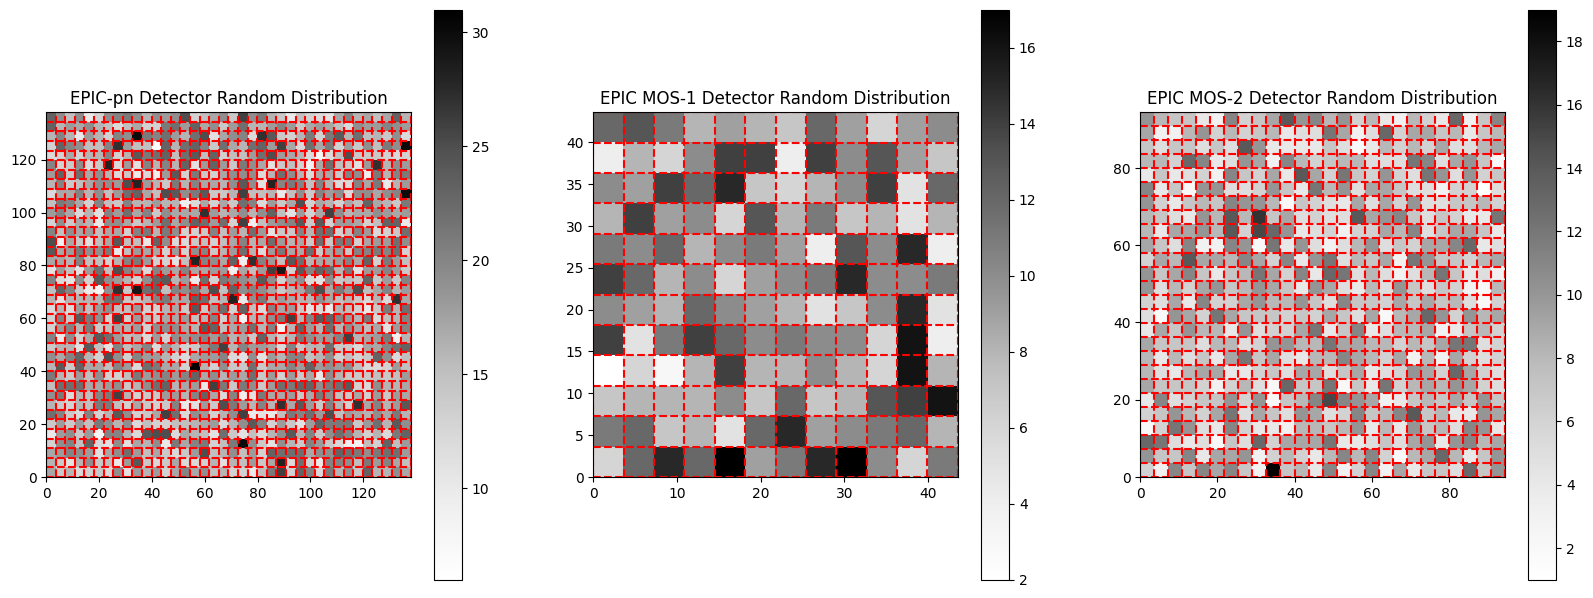

([19, 17, 9, 19, 21, 24, 15, 17, 17, 25],
 [11, 9, 6, 11, 5, 3, 14, 9, 17, 8],
 [5, 7, 3, 11, 8, 8, 8, 7, 6, 3])

In [270]:
monte_carlo(df, n_simulations= 10, ind = 0, plot_ex=True)

In [324]:
# Uranus+FoV
npn_0, nmos1_0, nmos2_0 = monte_carlo(df, n_simulations=int(5000), ind = 0, plot_ex =False)
npn_1, nmos1_1, nmos2_1 = monte_carlo(df, n_simulations=int(5000), ind = 1, plot_ex =False)
npn_2, nmos1_2, nmos2_2 = monte_carlo(df, n_simulations=int(5000), ind = 2, plot_ex =False)

0
1000
2000
3000
4000
0
1000
2000
3000
4000
0
1000
2000
3000
4000


In [345]:
#df_new = df_new.drop(columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts', 'Summed Expected Uranus Counts'])

In [349]:
# Append to df - expected counts if random, uniform scattering 
row1 = [np.mean(npn_0), np.mean(nmos1_0), np.mean(nmos2_0)]
row2 = [np.mean(npn_1), np.mean(nmos1_1), np.mean(nmos2_1)]
row3 = [np.mean(npn_2), np.mean(nmos1_2), np.mean(nmos2_2)]

df_exp = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts'])
#df_new = df_new.drop(columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts', 'Summed Expected Uranus Counts'])

#df.insert(7, 'PN Uranus Expected Counts', df_exp['PN Uranus Expected Counts'])
#df_new.insert(19, 'MOS-2 Uranus Expected Counts', df_exp['MOS-2 Uranus Expected Counts'])
df_new['Summed Expected Uranus Counts'] = df_new['PN Uranus Expected Counts'] + df_new['MOS-1 Uranus Expected Counts'] + df_new['MOS-2 Uranus Expected Counts']
df_new

,Observation Date,Uranus Diameter,PN Width,PN Height,PN Boxes,PN FoV Counts,PN Uranus Counts,PN Uranus Expected Counts,MOS-1 Width,MOS-1 Height,...,MOS-1 Uranus Counts,MOS-1 Uranus Expected Counts,MOS-2 Width,MOS-2 Height,MOS-2 Boxes,MOS-2 FoV Counts,MOS-2 Uranus Counts,MOS-2 Uranus Expected Counts,Summed Uranus Counts,Summed Expected Uranus Counts
0,August 2022,3.63,137.94,137.94,1444,24995,20,17.4244,43.56,43.56,...,7,9.7382,94.38,94.38,676,4987,7,7.4484,34,34.6110
1,January 2023,3.64,138.32,141.96,1482,33166,41,22.3842,43.68,43.68,...,11,14.5442,94.64,98.28,702,6677,10,9.5596,62,46.4880
2,February 2023,3.57,135.66,139.23,1482,9931,14,6.7694,42.84,42.84,...,5,3.5156,92.82,92.82,676,2137,2,3.1608,21,13.4458


In [296]:
# Just FoV Counts = Total (not completely right, but prob not much of a different w/ Uranus+FoV)
n_pn, n_mos1, n_mos2 = monte_carlo(df, n_simulations=int(5000), ind = 2, plot_ex =False) # ind corresponds to date of observation (i.e. 0 = 08/22, 1 = 01/23, 2 = 02/23)
n_pn_0, n_mos1_0, n_mos2_0 = monte_carlo(df, n_simulations=int(5000), ind = 0, plot_ex =False)
n_pn_1, n_mos1_1, n_mos2_1 = monte_carlo(df, n_simulations=int(5000), ind = 1, plot_ex =False)

0
1000
2000
3000
4000


In [322]:
# Append to df - expected counts if random, uniform scattering 
row1 = [np.mean(n_pn_0), np.mean(n_mos1_0), np.mean(n_mos2_0)]
row2 = [np.mean(n_pn_1), np.mean(n_mos1_1), np.mean(n_mos2_1)]
row3 = [np.mean(n_pn), np.mean(n_mos1), np.mean(n_mos2)]

df_exp = pd.DataFrame([row1, row2, row3], columns = ['PN Uranus Expected Counts', 'MOS-1 Uranus Expected Counts', 'MOS-2 Uranus Expected Counts'])
#df.insert(7, 'PN Uranus Expected Counts', df_exp['PN Uranus Expected Counts'])
df['Summed Uranus Counts'] = df['PN Uranus Counts'] + df['MOS-1 Uranus Counts'] + df['MOS-2 Uranus Counts']
df['Summed Expected Uranus Counts'] = df['PN Uranus Expected Counts'] + df['MOS-1 Uranus Expected Counts'] + df['MOS-2 Uranus Expected Counts']

,Observation Date,Uranus Diameter,PN Width,PN Height,PN Boxes,PN FoV Counts,PN Uranus Counts,PN Uranus Expected Counts,MOS-1 Width,MOS-1 Height,...,MOS-1 Uranus Counts,MOS-1 Uranus Expected Counts,MOS-2 Width,MOS-2 Height,MOS-2 Boxes,MOS-2 FoV Counts,MOS-2 Uranus Counts,MOS-2 Uranus Expected Counts,Summed Uranus Counts,Summed Expected Uranus Counts
0,August 2022,3.63,137.94,137.94,1444,24995,20,17.3350,43.56,43.56,...,7,9.6856,94.38,94.38,676,4987,7,7.3384,34,34.3590
1,January 2023,3.64,138.32,141.96,1482,33166,41,22.2472,43.68,43.68,...,11,14.4244,94.64,98.28,702,6677,10,9.5556,62,46.2272
2,February 2023,3.57,135.66,139.23,1482,9931,14,6.7014,42.84,42.84,...,5,3.5092,92.82,92.82,676,2137,2,3.2146,21,13.4252


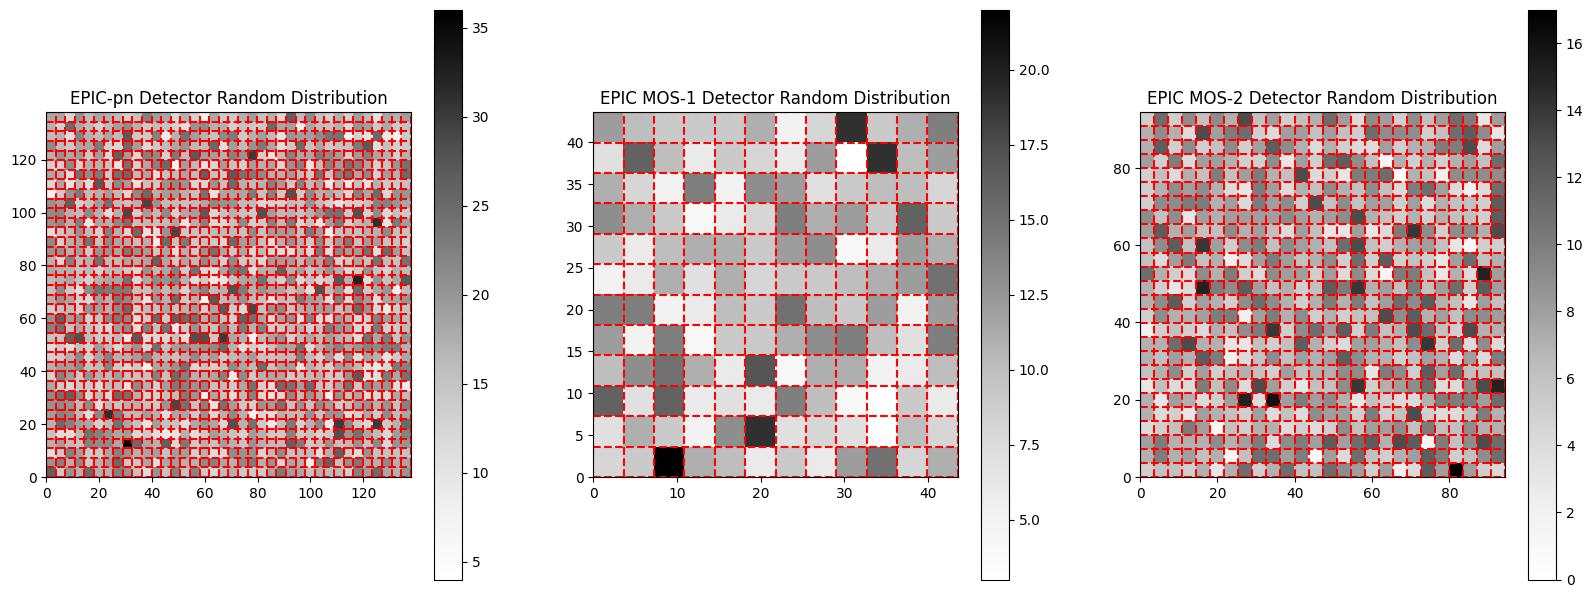

PN width & height bins are: 20 19
MOS-1 width & height bins are: 7 6
MOS-2 width & height bins are: 14 13


([23, 18, 13, 18, 26, 15, 12, 20, 13, 22],
 [9, 9, 4, 9, 10, 16, 11, 10, 16, 9],
 [10, 4, 5, 6, 5, 11, 7, 6, 5, 8])

In [268]:
monte_carlo(df, n_simulations= 10, ind = 2, plot_ex=True)

In [35]:
np.random.poisson?

Docstring:
poisson(lam=1.0, size=None)

Draw samples from a Poisson distribution.

The Poisson distribution is the limit of the binomial distribution
for large N.

.. note::
    New code should use the `~numpy.random.Generator.poisson`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
lam : float or array_like of floats
    Expected number of events occurring in a fixed-time interval,
    must be >= 0. A sequence must be broadcastable over the requested
    size.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``lam`` is a scalar. Otherwise,
    ``np.array(lam).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized Poisson distribution.

See Also
--------
random.Generator.poisson: which should be u